In [1]:
%matplotlib inline

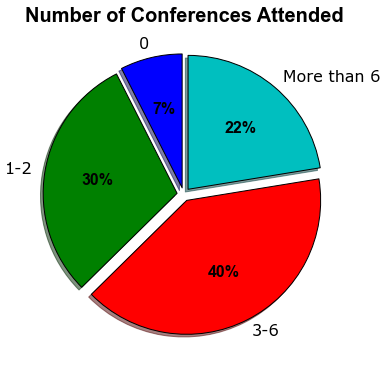

In [31]:
import psycopg2
from pylab import *

conn=psycopg2.connect('dbname=postgres user=survey password=present host=172.17.0.3')
cur = conn.cursor()
cur.execute("""select confcount,
    count(*) as prescount
    from presfeed
    group by confcount
    order by confcount""");

labels = []
fracs = []
explode = []
for rec in cur:
    labels.append(rec[0])
    fracs.append(rec[1])
    explode.append(0.05)

figure(1, figsize=(6,6))

patches, texts, autotexts = pie(fracs, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
[t.set_fontsize(16) for t in texts]
[a.set_fontsize(16) for a in autotexts]
[a.set_fontweight("bold") for a in autotexts]

title('Number of Conferences Attended', fontsize=20, fontweight='bold')

show()

conn.close()

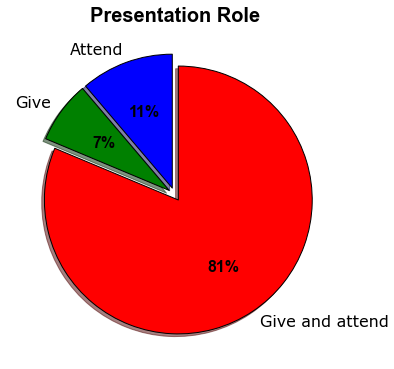

In [53]:
import psycopg2
from pylab import *

conn=psycopg2.connect('dbname=postgres user=survey password=present host=172.17.0.3')
cur = conn.cursor()
cur.execute("""select presrole,
    count(*) as prescount
    from presfeed
    group by presrole
    order by presrole""");

labels = []
fracs = []
explode = []
for rec in cur:
    labels.append(rec[0])
    fracs.append(rec[1])
    explode.append(0.05)

figure(1, figsize=(6,6))

patches, texts, autotexts = pie(fracs, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
[t.set_fontsize(16) for t in texts]
[a.set_fontsize(16) for a in autotexts]
[a.set_fontweight("bold") for a in autotexts]

title('Presentation Role', fontsize=20, fontweight='bold')

show()

conn.close()

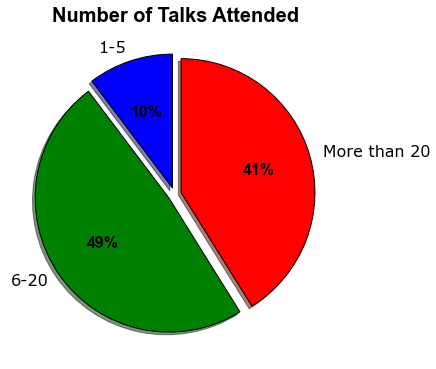

In [32]:
import psycopg2
from pylab import *

conn=psycopg2.connect('dbname=postgres user=survey password=present host=172.17.0.3')
cur = conn.cursor()
cur.execute("""select talkcount,
    count(*) as prescount
    from presfeed
    group by talkcount
    order by talkcount""");

labels = []
fracs = []
explode = []
for rec in cur:
    labels.append(rec[0])
    fracs.append(rec[1])
    explode.append(0.05)

figure(1, figsize=(6,6))

patches, texts, autotexts = pie(fracs, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
[t.set_fontsize(16) for t in texts]
[a.set_fontsize(16) for a in autotexts]
[a.set_fontweight("bold") for a in autotexts]

title('Number of Talks Attended', fontsize=20, fontweight='bold')

show()

conn.close()

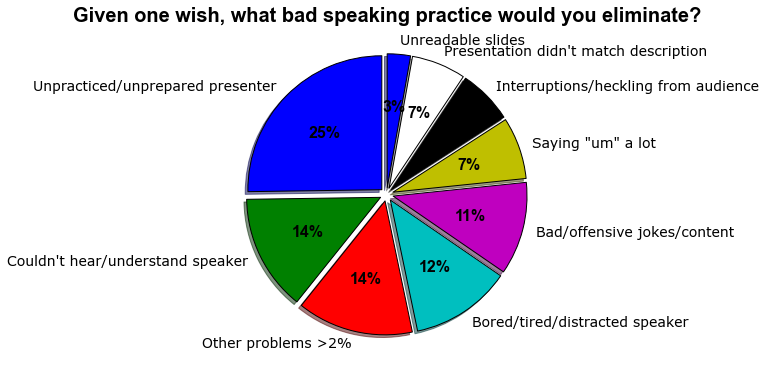

In [37]:
import psycopg2
from pylab import *

conn=psycopg2.connect('dbname=postgres user=survey password=present host=172.17.0.3')
cur = conn.cursor()
cur.execute("""with wishes as (
    select one_wish,
    count(*) as issuecount
from presfeed
group by one_wish)
select case when issuecount > 2 then one_wish else 'Other problems >2%' end as others,
    sum(issuecount) as probcount
from wishes
group by 1 order by 2 desc;""");

labels = []
fracs = []
explode = []
for rec in cur:
    labels.append(rec[0])
    fracs.append(rec[1])
    explode.append(0.05)

figure(1, figsize=(6,6))

patches, texts, autotexts = pie(fracs, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
[t.set_fontsize(14) for t in texts]
[a.set_fontsize(16) for a in autotexts]
[a.set_fontweight("bold") for a in autotexts]

title('Given one wish, what bad speaking practice would you eliminate?', fontsize=20, fontweight='bold')

show()

conn.close()

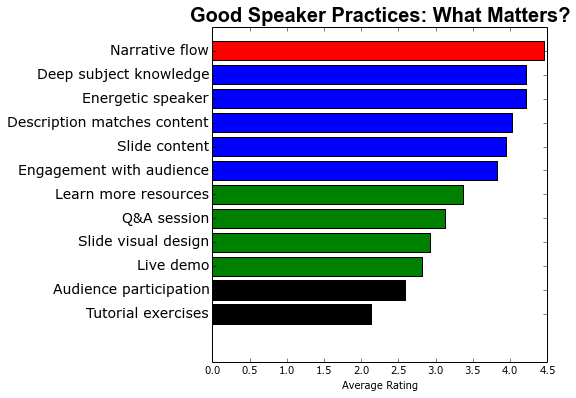

In [55]:
import psycopg2
from pylab import *

conn=psycopg2.connect('dbname=postgres user=survey password=present host=172.17.0.3')
cur = conn.cursor()
cur.execute("""SELECT label, avg, median FROM aggs WHERE good order by median, avg;""");

labels = []
fracs = []
colors = []

for rec in cur:
    labels.append(rec[0])
    fracs.append(rec[1])
    if rec[2] == 5:
        colors.append('r')
    elif rec[2] == 4:
        colors.append('b')
    elif rec[2] == 3:
        colors.append('g')
    else:
        colors.append('k')
    
figure(1, figsize=(6,6))

pos = arange(len(fracs))
barh(pos, fracs, align='center', color=colors)
yticks(pos, labels, fontsize=14)
xlabel("Average Rating")

title("Good Speaker Practices: What Matters?", fontsize=20, fontweight='bold')
show()

conn.close()

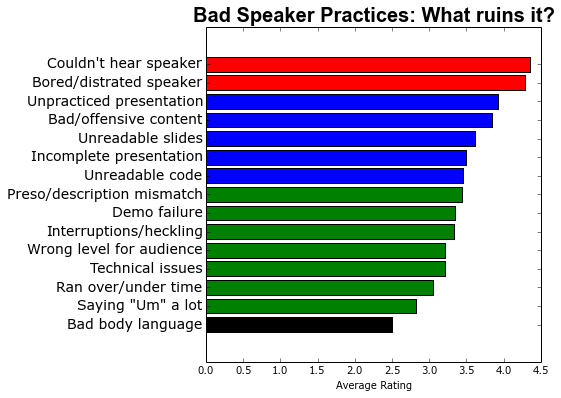

In [56]:
import psycopg2
from pylab import *

conn=psycopg2.connect('dbname=postgres user=survey password=present host=172.17.0.3')
cur = conn.cursor()
cur.execute("""SELECT label, avg, median FROM aggs WHERE not good order by median, avg;""");

labels = []
fracs = []
colors = []


for rec in cur:
    labels.append(rec[0])
    fracs.append(rec[1])
    if rec[2] == 5:
        colors.append('r')
    elif rec[2] == 4:
        colors.append('b')
    elif rec[2] == 3:
        colors.append('g')
    else:
        colors.append('k')

figure(1, figsize=(6,6))

pos = arange(len(fracs))
barh(pos, fracs, align='center', color=colors)
yticks(pos, labels, fontsize=14)
xlabel("Average Rating")

title("Bad Speaker Practices: What ruins it?", fontsize=20, fontweight='bold')
show()

conn.close()